# Aim

`prepare input data`  
`read all wdi excel files, filter by country and merge all of them`    
`create correlation matrix and Visualize with R language (Spearman test and Hierarchical Clustering)`  
`correlation between vector distance and metadata difference`  

In [4]:
import glob
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from functools import reduce
import seaborn as sns

mypath = 'input_data/wdi.worldbank/'

excelfiles = []
df = []
for file in glob.glob(mypath+"*.xlsx"):
    excelfiles.append(file)

i=0
data_frames = []
for excel in excelfiles:
    i += 1
    data_frames.append(pd.read_excel(excel, index_col=0))
    
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Country'], how='right'), data_frames).fillna('void')
#df_merged.to_excel("output.xlsx")      


# Heatmaps and Correlation Matrix Plots

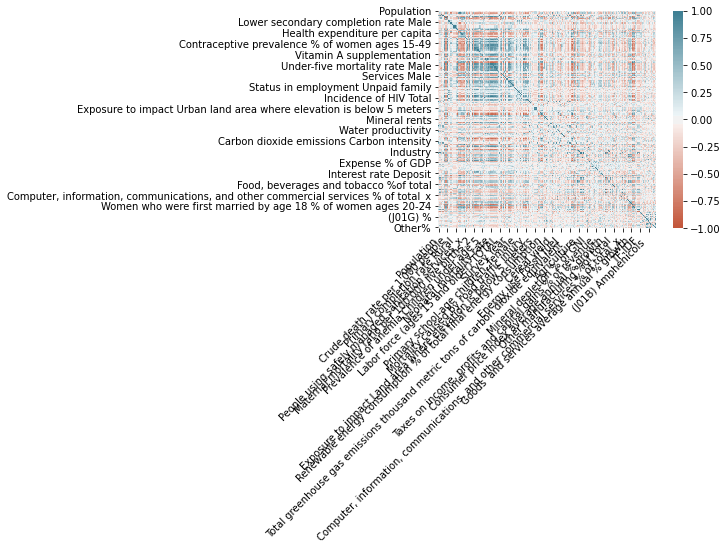

In [2]:
corr = df_merged.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [3]:
list(df_merged.columns)

['Population',
 'Surface area',
 'Population density',
 'Gross national income, Atlas method',
 'Gross national income per capita, Atlas method',
 'Purchasing power parity gross national income',
 'Purchasing power parity gross national income per capita',
 'Gross domestic product_x',
 'Gross domestic product per capita',
 'Population 2000 millions',
 'Population 2018 millions',
 'Average annual population growth %',
 '% Population age composition Ages 0-14 ',
 '% Population age composition Ages 15-64',
 '% Population age composition Ages 65+',
 'Dependency ratio young % of working-age population',
 'Dependency ratio old % of working-age population',
 'Crude death rate per 1,000 people',
 'Crude birth rate per 1,000 people',
 'Primary completion rate ',
 'Primary completion rate female_x',
 'Lower secondary completion rate Male',
 'Lower secondary completion rate female',
 'Youth literacy rate Male',
 'Youth literacy rate female',
 'Adult literacy rate Male',
 'Adult literacy rate fema